# Project

---

## Scope & Ground Rules


### Part 1 - 50% | Scope

**it's composed for `5` small assignments with guidelines. The assignment scores **evenly distributed across all questions** (each question accounts for 10% of the final score). **


**Any question please contact to me via Slack or Email.**


---

**IMPORTANT NOTES to have in mind** 

**a) Code Readability is taken into account for the evaluation, so please make it simple, readable and explain your operations when necessary.**

**b) Make sure that the evaluater can re-run the notebook from the begining, i.e. before you delivery the assignment please go to the bar on top of your notebook -> `Kernel` -> `Restart & Run all`. Validate that all outputs are as you expect.**

----




# Part 1

## 1- Load Data

**1.1- Load **house_prices_final_project.csv** to a Pandas DataFrame. You can see in `data_description.txt` file the description of each column**

---

### Importação de bibliotecas

O seguinte script utiliza várias bibliotecas para preparação e análise de dados. Aqui está uma breve explicação de cada importação:

- `pandas` (`pd`): Utilizado para manipulação e análise de dados através da utilização de DataFrames.
- `KBinsDiscretizer` (de `sklearn.preprocessing`): Realiza discretização de dados contínuos em intervalos.
- `SimpleImputer` (de `sklearn.impute`): Preenche valores ausentes com estratégias como média, mediana ou valor constante.
- `OneHotEncoder` (de `sklearn.preprocessing`): Codifica variáveis categóricas em representações numéricas binárias (one-hot encoding).
- `MinMaxScaler` (de `sklearn.preprocessing`): Escala os valores para um intervalo específico (por exemplo, entre 0 e 1).
- `split_dataset` (de `pgds_mpp_utils`):  função personalizada para dividir um dataset em treino e teste.
- `score_approach` (de `pgds_mpp_utils`): função personalizada para treinar e avaliar modelo  e retornar a precisão .


In [3436]:
import pandas as pd 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder as OHE
from pgds_mpp_utils import split_dataset, score_approach
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

Código abaixo carrega os dados de um ficheiro CSV para um DataFrame do pandas:

In [3437]:

df = pd.read_csv('data/house_prices_final_project.csv')

Apresentação dos primeiros 5 registos para confirmação de correta importação do passo anterior.

In [3438]:
df.head(5)  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1.2- Print dataset total number of `observations` and `variables`**

---

O bloco de código a seguir é utilizado para obter as dimensões do DataFrame e apresentar o número de linhas (observações) e colunas (variáveis):


In [3439]:
observations, variables = df.shape

print(f"Número de observações: {observations} | Número de variáveis: {variables}")

Número de observações: 1460 | Número de variáveis: 81


---

### Please find below the subset of columns we are going to consider for the rest of the assignment

In [3440]:
columns_list = ['FullBath',
                'TotRmsAbvGrd',
                'Fireplaces',
                'GarageYrBlt',
                'GarageCars',
                'GarageArea',
                'LotFrontage',
                'WoodDeckSF',
                'OpenPorchSF',
                'SaleType',
                'SaleCondition',
                'SalePrice']

**1.3- Create a new dataframe which is a subset of the origin dataframe based on the columns listed above.**

---

O bloco de código a seguir cria um subconjunto do DataFrame com colunas selecionadas e exibe as primeiras linhas para confirmar o resultado:

In [3441]:
# Criar DataFrame com  subconjunto de colunas selecionadas
df_subset = df[columns_list]

# Exibir as primeiras linhas para confirmação de passo anterior
df_subset.head()

,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotFrontage,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,2,8,0,2003.0,2,548,65.0,0,61,WD,Normal,208500
1,2,6,1,1976.0,2,460,80.0,298,0,WD,Normal,181500
2,2,6,1,2001.0,2,608,68.0,0,42,WD,Normal,223500
3,1,7,1,1998.0,3,642,60.0,0,35,WD,Abnorml,140000
4,2,9,1,2000.0,3,836,84.0,192,84,WD,Normal,250000


In [3442]:
# Usar o info() consultar mem usage e da contagem de non null values de cada col
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FullBath       1460 non-null   int64  
 1   TotRmsAbvGrd   1460 non-null   int64  
 2   Fireplaces     1460 non-null   int64  
 3   GarageYrBlt    1379 non-null   float64
 4   GarageCars     1460 non-null   int64  
 5   GarageArea     1460 non-null   int64  
 6   LotFrontage    1201 non-null   float64
 7   WoodDeckSF     1460 non-null   int64  
 8   OpenPorchSF    1460 non-null   int64  
 9   SaleType       1460 non-null   object 
 10  SaleCondition  1460 non-null   object 
 11  SalePrice      1460 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 137.0+ KB


## 2- Creating Labels

**2.1- Create the `target` column based on `SalePrice`. The split should be done using the median value to create 2 new buckets. `Min->Median` bucket should have assigned the value `0` while the other bucket (`Median->Max`) value should be `1`.**



**Note: you are free to decide the buckets boundaries**


---

O comando abaixo é utilizado para gerar estatísticas descritivas do DataFrame `df_subset` e transpor a saída para uma visualização mais clara:

In [3443]:
df_subset.describe().T

,count,mean,std,min,25%,50%,75%,max
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.0,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.0,14.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.0,1.0,1.0,3.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0
GarageCars,1460.0,1.767123,0.747315,0.0,1.0,2.0,2.0,4.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.0,1418.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.0,857.0
OpenPorchSF,1460.0,46.660274,66.256028,0.0,0.0,25.0,68.0,547.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


O bloco de código a seguir utiliza o `KBinsDiscretizer` para categorizar a coluna `SalePrice` em dois grupos (bins) com base na estratégia de quantis:


In [3444]:

# Criar o KBinsDiscretizer para 2 bins usando a estratégia quantile
discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')

# Ajustar e transformar os valores de SalePrice
df_subset['SalesPriceTarget'] = discretizer.fit_transform(df_subset[['SalePrice']]).astype(int).flatten()

print(df_subset['SalesPriceTarget'].value_counts())


SalesPriceTarget
1    732
0    728
Name: count, dtype: int64


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\2765499866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['SalesPriceTarget'] = discretizer.fit_transform(df_subset[['SalePrice']]).astype(int).flatten()


In [3445]:
df_subset.sample(10)

,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotFrontage,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,SalesPriceTarget
297,2,7,1,1997.0,2,576,66.0,0,10,WD,Normal,239000,1
1005,2,6,0,1977.0,1,328,65.0,210,0,WD,Normal,149900,0
721,1,3,0,2004.0,2,420,NaN,160,0,WD,Normal,143000,0
789,2,9,0,1966.0,2,444,NaN,133,168,WD,Normal,187500,1
849,2,7,1,1976.0,2,512,80.0,113,100,WD,Normal,187000,1
853,1,7,1,1964.0,2,645,NaN,180,0,WD,Normal,158000,0
199,2,7,1,2004.0,3,856,76.0,0,26,WD,Normal,274900,1
1116,2,7,1,2002.0,2,527,NaN,120,0,WD,Normal,184100,1
665,2,7,1,2000.0,2,504,106.0,188,124,WD,Normal,230500,1
1152,1,6,1,1956.0,2,470,90.0,0,0,WD,Abnorml,230000,1


## 3- Handling Missing Values

**3.1- List the amount of missing values per column**

---

O bloco de código seguinte identifica e lista o número de valores ausentes em cada coluna do DataFrame `df_subset`:

In [3446]:
# Listar o número de valores ausentes por coluna
missing_values = df_subset.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values


LotFrontage    259
GarageYrBlt     81
dtype: int64

**3.2- Take care of the missing values in the column `LotFrontage`**

---

A função `plot_histogram` cria um histograma com a opção de incluir uma linha KDE para um determinado DataFrame e coluna, permitindo personalização do gráfico com vários parâmetros.


In [3447]:
def plot_histogram(data, x_column, bins=100, kde=True, line_width=3, title='Depth Distribution of Diamonds', xlabel='Diamond Depth', ylabel='# Diamonds', color=None):
    """
    Cria um histograma com opção de incluir uma linha KDE para um determinado DataFrame e coluna.

    Parâmetros:
        data (DataFrame): O DataFrame contendo os dados a serem plotados.
        x_column (str): O nome da coluna a ser plotada no eixo x.
        bins (int): Número de bins para o histograma (o padrão é 100).
        kde (bool): Indica se deve incluir uma linha KDE (o padrão é True).
        line_width (int): Espessura da linha KDE (o padrão é 3).
        title (str): Título do gráfico (o padrão é 'Distribuição da Profundidade dos Diamantes').
        xlabel (str): Rótulo para o eixo x (o padrão é 'Profundidade do Diamante').
        ylabel (str): Rótulo para o eixo y (o padrão é '# Diamantes').
    """
    
    fig = plt.figure(figsize=(18, 6))

    # cria histograma
    sns.histplot(
        data,
        x=x_column,
        bins=bins,
        kde=kde,
        line_kws={'lw': line_width},
        color=color
    )

    # Adiciona titulos e legenda dos eixos
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

Na célula abaixo, é chamado a função definida acima, de forma a gerar um histograma para validar distribuição

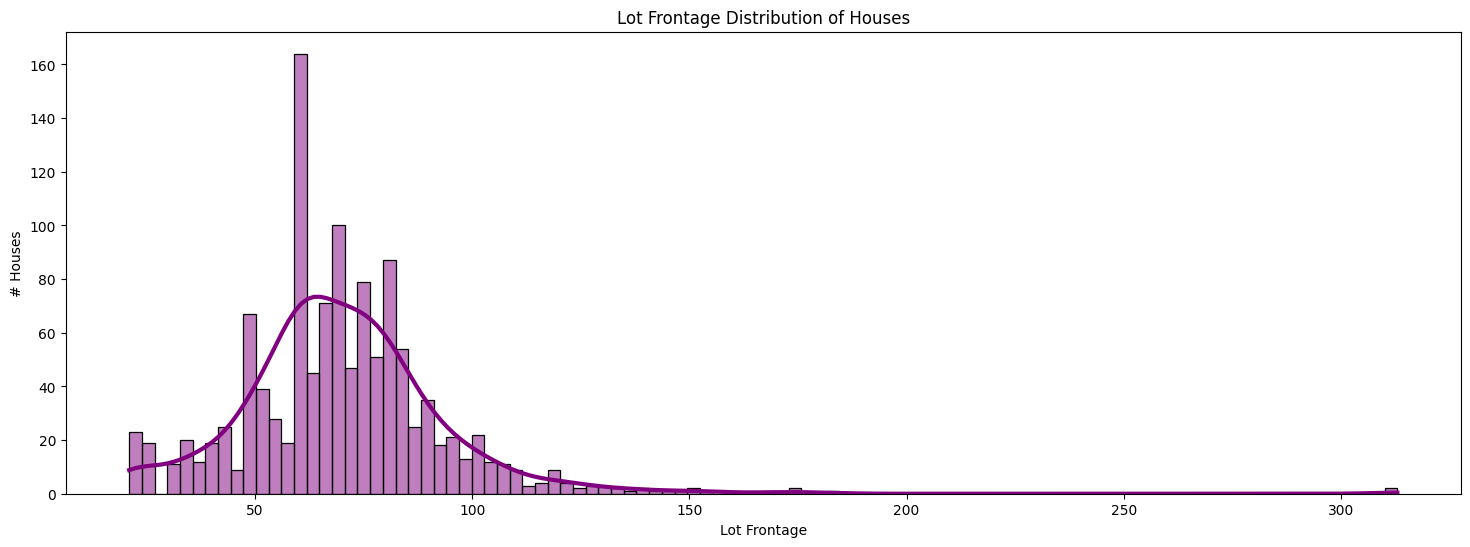

In [3448]:
plot_histogram(df_subset, 'LotFrontage', bins=100, kde=True, line_width=3, title='Lot Frontage Distribution of Houses', xlabel='Lot Frontage', ylabel='# Houses',color='purple')

Pelo histograma, a forma geral da distribuição parece ligeriamente assimétrica à direita, indicando que a maioria dos valores estão concentrados na parte inferior do intervalo (entre 0 e 100) com uma cauda longa à direita que sugere uma análise a possibilidade d eoutlieres.

Como é possivel ver acima  na célula de estatísticas descritivas através do comando `describe()`, verifica-se que a mediana (69) está muito próxima à média (70.05), sugerindo uma maior concentração dos valores em torno da média, no entanto existem  valores altos como 313, sugerindo a possibilidade de outliers.
Abaixo é feito a verificação de outliers segundo o metodo intequartis. 



In [3449]:
def detect_outliers_iqr(data, column_name):
    """
    Detecta outliers em uma coluna específica de um DataFrame utilizando o método IQR.

    Parâmetros:
        data (pd.DataFrame): O DataFrame contendo os dados.
        column_name (str): O nome da coluna para analisar outliers.

    Retorna:
        dict: Um dicionário com a contagem total de outliers, limite inferior e limite superior.
        pd.DataFrame: Um DataFrame atualizado com uma coluna adicional indicando outliers.

    """
    # Calcula o IQR (Intervalo Interquartil)
    Q1 = data[column_name].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = data[column_name].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Diferença entre Q3 e Q1

    # Define os limites do IQR para detectar outliers
    lower_bound_iqr = Q1 - 1.5 * IQR  # Limite inferior
    upper_bound_iqr = Q3 + 1.5 * IQR  # Limite superior

    # Detecta os outliers com base nos limites definidos
    data[f"{column_name}_Outlier"] = data[column_name].map(
        lambda x: 1 if x < lower_bound_iqr or x > upper_bound_iqr else 0
    )

    # Conta o número total de outliers encontrados
    outlier_count = data[f"{column_name}_Outlier"].sum()
    outlier_info = {
        "Total de Outliers": outlier_count,  # Total de outliers
        "Limite Inferior": lower_bound_iqr,  # Limite inferior do IQR
        "Limite Superior": upper_bound_iqr  # Limite superior do IQR
    }

    # Retorna as informações de outliers e o DataFrame atualizado
    return outlier_info, data

In [3450]:
outlierinfo = detect_outliers_iqr(df_subset, 'LotFrontage')
print(outlierinfo[0])

{'Total de Outliers': np.int64(88), 'Limite Inferior': np.float64(27.5), 'Limite Superior': np.float64(111.5)}


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\3659428370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column_name}_Outlier"] = data[column_name].map(


Verificando que existe cerca de 88 registos outliers, foi utilizado a técnica de imputação para preencher os valores ausentes na coluna `LotFrontage` com base na mediana que é mais robusta a outliers.

In [3451]:
# Criando o imputer com a estratégia de mediana
imputer = SimpleImputer(strategy='median')

# Aplicando o imputer na coluna LotFrontage
df_subset[['LotFrontage']] = imputer.fit_transform(df_subset[['LotFrontage']])

# Verificando se há valores nulos após a imputação
missing_after_imputation = df_subset['LotFrontage'].isnull().sum()
print(f'Valores nulos após imputação: {missing_after_imputation}')

# Eliminar coluna de identificação de outlier, porque já não é preciso
df_subset.drop('LotFrontage_Outlier', axis=1)


Valores nulos após imputação: 0


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\1107123994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[['LotFrontage']] = imputer.fit_transform(df_subset[['LotFrontage']])


,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotFrontage,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,SalesPriceTarget
0,2,8,0,2003.0,2,548,65.0,0,61,WD,Normal,208500,1
1,2,6,1,1976.0,2,460,80.0,298,0,WD,Normal,181500,1
2,2,6,1,2001.0,2,608,68.0,0,42,WD,Normal,223500,1
3,1,7,1,1998.0,3,642,60.0,0,35,WD,Abnorml,140000,0
4,2,9,1,2000.0,3,836,84.0,192,84,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,7,1,1999.0,2,460,62.0,0,40,WD,Normal,175000,1
1456,2,7,2,1978.0,2,500,85.0,349,0,WD,Normal,210000,1
1457,2,9,2,1941.0,1,252,66.0,0,60,WD,Normal,266500,1
1458,1,5,0,1950.0,1,240,68.0,366,0,WD,Normal,142125,0


## 4- Handling Categorical Data

**4.1- Split categorical feature into a `df_categorical` dataframe**

---

In [3452]:
df_subset

,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotFrontage,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,SalesPriceTarget,LotFrontage_Outlier
0,2,8,0,2003.0,2,548,65.0,0,61,WD,Normal,208500,1,0
1,2,6,1,1976.0,2,460,80.0,298,0,WD,Normal,181500,1,0
2,2,6,1,2001.0,2,608,68.0,0,42,WD,Normal,223500,1,0
3,1,7,1,1998.0,3,642,60.0,0,35,WD,Abnorml,140000,0,0
4,2,9,1,2000.0,3,836,84.0,192,84,WD,Normal,250000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,7,1,1999.0,2,460,62.0,0,40,WD,Normal,175000,1,0
1456,2,7,2,1978.0,2,500,85.0,349,0,WD,Normal,210000,1,0
1457,2,9,2,1941.0,1,252,66.0,0,60,WD,Normal,266500,1,0
1458,1,5,0,1950.0,1,240,68.0,366,0,WD,Normal,142125,0,0


O código abaixo seleciona as colunas categóricas do DataFrame `df_subset` e cria um novo DataFrame apenas com essas colunas. Além disso, exibe informações sobre o DataFrame resultante:

In [3453]:
# Criar DataFrame apenas com as colunas categóricas 
df_categorical = df_subset[df_subset.select_dtypes(include=['object']).columns.tolist()]

# Exibir as colunas categóricas selecionadas
print(df_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SaleType       1460 non-null   object
 1   SaleCondition  1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB
None


In [3454]:
df_categorical.shape

(1460, 2)

O bloco de código abaixo converte colunas categóricas do tipo `object` para o tipo `category` no DataFrame `df_categorical` para otimização de utilização de memória e exibe informações sobre o resultado:

In [3455]:
# Function to display the memory usage in MB for either a) a Pandas DataFrame or b) a Pandas Serie

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.4f} MB".format(usage_mb)

Convertendo colunas para o tipo `category` para melhorar a eficiência na utilização de memória e apresentação dos resultados

In [3456]:
# Criação de variaveis categorizadas, e apresentação de tipo de dados 

df_categorical['SaleTypeCat'] = df_categorical['SaleType'].astype('category')
df_categorical['SaleConditionCat'] = df_categorical['SaleCondition'].astype('category')
df_categorical.info()

# Apresentar utilização de memória 

print('*Informação Uso de Memória de Variaveis*')
print(f"UsoSaleType: {mem_usage(df_categorical['SaleType'])}")
print(f"SaleTypeCat: {mem_usage(df_categorical['SaleTypeCat'])}")
print(f"SaleCondition: {mem_usage(df_categorical['SaleCondition'])}")
print(f"SaleConditionCat: {mem_usage(df_categorical['SaleConditionCat'])}")

df_categorical.drop(columns=['SaleType', 'SaleCondition'],inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SaleType          1460 non-null   object  
 1   SaleCondition     1460 non-null   object  
 2   SaleTypeCat       1460 non-null   category
 3   SaleConditionCat  1460 non-null   category
dtypes: category(2), object(2)
memory usage: 26.4+ KB
*Informação Uso de Memória de Variaveis*
UsoSaleType: 0.0714 MB
SaleTypeCat: 0.0023 MB
SaleCondition: 0.0769 MB
SaleConditionCat: 0.0020 MB


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\2488068249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['SaleTypeCat'] = df_categorical['SaleType'].astype('category')
C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\2488068249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['SaleConditionCat'] = df_categorical['SaleCondition'].astype('category')
C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\2488068249.py:15: SettingWithCopyWarning

**4.2- Apply OHE to `SaleType`**

---


O código abaixo aplica o One-Hot Encoding (OHE) para transformar variáveis categóricas em representações numéricas binárias e depois concatena os resultados ao DataFrame original.



In [3457]:
# Inicializar o OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)  

# Ajustar o encoder e transformar os dados
salestype_ohe = ohe.fit_transform(df_categorical[['SaleTypeCat']])

# Criar um DataFrame com os resultados do OHE
ohe_df = pd.DataFrame(salestype_ohe, columns=list(ohe.categories_[0]))

# Concatenar o resultado ao DataFrame original
df_categorical = pd.concat([df_categorical, ohe_df], axis=1)

df_categorical.drop(columns=['SaleTypeCat', 'SaleConditionCat'],inplace=True)

# Exibir 15 linhas aleatórias do DataFrame atualizado para verificar o resultado
df_categorical.sample(15)

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 5- Feature Scaling

**5.1- Apply feature scaling to the variable `GarageArea`. Make sure that the new range fall between `-1/3` and `3`.**

---

O método `.describe()` do pandas para apresentar algumas estatísticas descritivas e entender as características e a distribuição dos dados para a coluna `GarageArea`


In [3458]:
print(df_subset['GarageArea'].describe())


count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


No código abaixo é utilizado o método `MinMaxScaler` da biblioteca `sklearn` para normalizar uma coluna de um DataFrame, ajustando os valores para o intervalo personalizado requerido no enunciado -1/3 e 3. No final é apresentado os novos valores máximo e minimo da variavel. 


In [3459]:
mmscaler = MinMaxScaler(feature_range=(-1/3, 3))
df_subset['GarageAreaNormalized'] = mmscaler.fit_transform(df_subset[['GarageArea']])
print (f'Valores de garagem normalizados, entre : vamor máximo {df_subset['GarageAreaNormalized'].max()} e valor minimo {df_subset['GarageAreaNormalized'].min()}  ')


Valores de garagem normalizados, entre : vamor máximo 3.0 e valor minimo -0.3333333333333333  


C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\2326761728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['GarageAreaNormalized'] = mmscaler.fit_transform(df_subset[['GarageArea']])


---

## End of Part 1

---

# Part 2

### Part 2 - 50% | Scope

Part 2 entails a project using the same dataset. The goal is to prove your data preprocessing skills. As output from this project, you should delivery the **notebook with the code you have done**.

Please apply, at least, **6 transformations** to the feature set you have in hands (or to the features which makes sense to apply the transformation). Each transformation should be accompanied by an explanation . Last but not least, compare the benefits of such transformation with the baseline score or the last best score. 

Regarding the variables you have to use throughout the Part 2, there are 6 in the total, 3 of them you are free to choose while the remaining 3 I have picked for you:
* YearBuilt
* LotFrontage
* MasVnrType

Make your baseline progressive, i.e. please consider the score from the previous transformation as the new baseline if it shows improvements. Example:

    Baseline - subset of transformations [None]  = 60% accuracy
    Iteration #1 - subset of transformations [A]     = 64% accuracy -> new baseline
    Iteration #2 - subset of transformations [A,B]   = 63% accuracy    (future scaling, ou imputação, ou, pelo menos 6 transformações)
    Iteration #3 - subset of transformations [A,B,C] = 68% accuracy -> new baseline
    ...
    Iteration #N - subset of transformations [A,B,C,..., N]
    (Being A, B, C a transformation that uses 1 or N features.)

Transformation example: encoding `color` & `country` with `One-Hot-Encoding`.

The `target` variable should be used to compute the accuracy (please use the `Target` you have created on the exercise 2.1, part1).


Remark:
* you shall use 6 variable for the assessment
* 3 out of 6 features are designated in the section on the top of the notebook
* the 3 remaining variables are up to you to choose
* you can consider any variable from the original dataset during this assessment

Above all, take this opportunity to practice :)

**Good luck!**

---

### 2.1 Importação de Informação Adicional para o dataframe parte 1

No código abaixo, a fonte de dados inicial é lida novamente para obter a informação relativa às colunas `yearbuilt` e `MasVnrType`, conforme requerido no enunciado, já que estas não estavam incluídas na lista de colunas da parte 1 do trabalho. Após obter os dados no dataframe df2, os valores destas variáveis são copiados para o dataframe proveniente da parte 1 do trabalho.

In [3460]:
df2 = pd.read_csv('data/house_prices_final_project.csv')
columns_list.extend(['YearBuilt', 'MasVnrType'])
columns_list

['FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleType',
 'SaleCondition',
 'SalePrice',
 'YearBuilt',
 'MasVnrType']

In [3461]:
# Criar um DataFrame com o subconjunto de colunas necessárias e copiar os valores das duas colunas adicionais para o DataFrame inicial.
df_subsetpt2 = df2[columns_list]
print(df_subsetpt2.sample(10))
df_subset[['YearBuilt', 'MasVnrType']] = df_subsetpt2[['YearBuilt', 'MasVnrType']].copy()

      FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
206          1             8           1       1962.0           1         349   
1317         2             5           1       2006.0           2         466   
276          2             7           0       2003.0           2         573   
1303         2             7           0       2005.0           3         834   
16           1             5           1       1970.0           2         480   
322          2             8           1       1987.0           2         576   
1123         1             4           0          NaN           0           0   
468          2             7           1       2006.0           3         866   
365          1             6           0       1964.0           1         468   
940          2             8           0       1976.0           2         574   

      LotFrontage  WoodDeckSF  OpenPorchSF SaleType SaleCondition  SalePrice  \
206          40.0           

C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\3519457713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[['YearBuilt', 'MasVnrType']] = df_subsetpt2[['YearBuilt', 'MasVnrType']].copy()
C:\Users\PereiraRodrigues\AppData\Local\Temp\ipykernel_7652\3519457713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[['YearBuilt', 'MasVnrType']] = df_subsetpt2[['YearBuilt', 'MasVnrType']].copy()


Apresentar amostra aleatória de 10 linhas do DataFrame `df_subset` utilizado como dataset base para criação do baseline  

In [3462]:
df_subset.sample(10)

,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,LotFrontage,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,SalesPriceTarget,LotFrontage_Outlier,GarageAreaNormalized,YearBuilt,MasVnrType
934,2,9,1,1960.0,2,505,313.0,0,0,WD,Normal,242000,1,1,0.853785,1960,NaN
353,1,5,0,2005.0,2,484,60.0,106,0,WD,Normal,105900,0,0,0.804419,1928,NaN
292,1,8,1,1949.0,1,281,60.0,0,0,WD,Normal,131000,0,0,0.327221,1949,NaN
1411,1,6,0,1950.0,1,271,80.0,0,0,WD,Normal,140000,0,0,0.303714,1950,NaN
19,1,6,0,1958.0,1,294,70.0,0,0,COD,Abnorml,139000,0,0,0.357781,1958,NaN
1275,2,10,0,1948.0,2,400,95.0,0,0,WD,Normal,137000,0,0,0.606958,1948,Stone
326,1,6,2,1993.0,2,473,32.0,122,30,Con,Normal,324000,1,0,0.778561,1993,NaN
244,2,8,2,1994.0,2,463,69.0,0,130,WD,Normal,205000,1,0,0.755054,1994,NaN
820,2,6,0,2003.0,2,595,72.0,0,45,WD,Normal,183000,1,0,1.065350,2003,NaN
674,1,5,1,1965.0,1,384,80.0,426,0,WD,Normal,140000,0,0,0.569346,1965,NaN


### 2.1 Construção Baseline Inicial





Abaixo são definidas as variaveis pre selecionadas no enunciado

In [3463]:
# initial features pre-selected
preselected_features = ['LotFrontage','MasVnrType','YearBuilt']

Abaixo é criado uma função plot_correlation_heatmap  utilizada para gerar um heatmap que visualiza uma matriz de correlação entre as possíveis variáveis numéricas e a variável target. O objetivo é auxiliar na seleção de variáveis numéricas que possam contribuir para melhorar a performance do modelo previsão da variavel target

In [3464]:
def plot_correlation_heatmap(corr_matrix, title='Heatmap of Pearson Correlation', cmap="coolwarm", vmin=-1, vmax=1):
    """
    Gera um heatmap para visualizar a matriz de correlação.

    Parâmetros:
        corr_matrix (DataFrame ou ndarray): Matriz de correlação a ser visualizada.
        title (str): Título do heatmap (o padrão é 'Heatmap of Pearson Correlation').
        cmap (str): Paleta de cores a ser usada no heatmap (o padrão é 'coolwarm').
        vmin (float): Valor mínimo da escala de cores (o padrão é -1).
        vmax (float): Valor máximo da escala de cores (o padrão é 1).
    """
    # Calcular a máscara para a parte superior da matriz
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Criar o heatmap
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        mask=mask
    )

    # Adicionar o título
    plt.title(title)
    plt.show()


É criado um dataframe de possiveis variaveis numericas, onde são excluidas as variaveis preselecionadas.

In [3465]:
#Choose features
feature_seletor_df = df2[columns_list]
feature_seletor_df = feature_seletor_df.drop(preselected_features, axis=1)
numerical_features = feature_seletor_df.select_dtypes(include='number')
# Check for missing values
missing_values = numerical_features.isnull().sum()
missing_values


C:\Users\PereiraRodrigues\AppData\Roaming\Python\Python313\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
SalePrice        0
dtype: int64

Não tendo a certeza sobre a relação entre as variaveis selecionadas, decidi testar ambos os cenários para cobrir relações lineares (Pearson) e monotónicas (Spearman). Abaixo é feito o teste para ambos os cenários utilizando a função Corr() disponivel na biblioteca pandas.

In [3466]:
#Calculate the Pearson correlation
corr_pearson = numerical_features.corr(method='pearson')
#Calculate the Spearman correlation
corr_spearman = numerical_features.corr(method='spearman')

Abaixo  a função `plot_correlation_heatmap` é invocada passando as matrizes de correlação calculadas no ponto anterior de forma a  criar uma visualização do tipo heatmap.


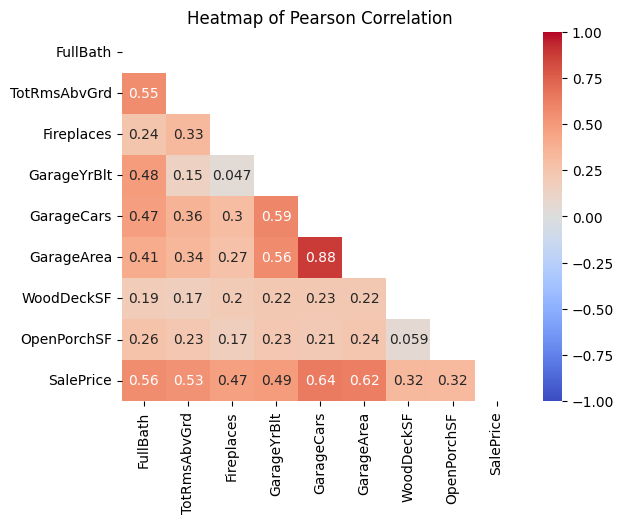

In [3467]:
plot_correlation_heatmap(corr_pearson,'Heatmap of Pearson Correlation',"coolwarm", -1, 1)

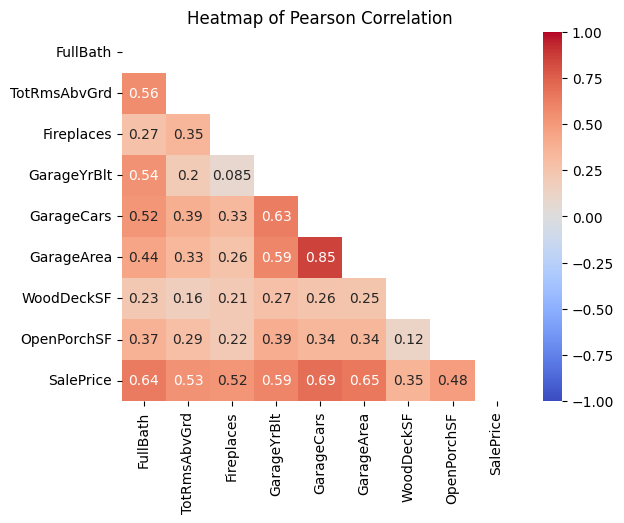

In [3468]:
plot_correlation_heatmap(corr_spearman,'Heatmap of Pearson Correlation',"coolwarm", -1, 1)

pós analisar ambos os gráficos acima, verifico que as variáveis `GarageCars e GarageArea` apresentam um nível de correlação que pode contribuir para explicar a variável preço. A terceira variável selecionada será `SalesCondition`, por se tratar de uma variável categórica, considerando a necessidade de explorar diferentes transformações, mesmo que esta possa não contribuir diretamente para a explicação do preço.

No código abaixo, é construída a baseline inicial, selecionando as variáveis iniciais, incluindo as três variáveis definidas no enunciado. Primeiro, é definida a lista de variáveis mencionadas no enunciado (`YearBuilt`, `LotFrontage` e `MasVnrType`). Em seguida, utiliza-se o método extend() para adicionar as variáveis escolhidas por mim (`SaleCondition`, `GarageArea` e `GarageCars`), bem como a variável target da parte 1, ponto 2.1 `SalesPriceTarget`, à lista de features. Por fim, é criado um novo DataFrame, df_subsetpt2, com base no subconjunto de colunas selecionadas.

In [3469]:
# Select initial features, including the specified ones
selected_features = ['YearBuilt', 'LotFrontage', 'MasVnrType']
selected_features.extend( ['SaleCondition', 'GarageArea', 'GarageCars','SalesPriceTarget'])
df_subsetpt2 = df_subset[selected_features]
df_subsetpt2

,YearBuilt,LotFrontage,MasVnrType,SaleCondition,GarageArea,GarageCars,SalesPriceTarget
0,2003,65.0,BrkFace,Normal,548,2,1
1,1976,80.0,NaN,Normal,460,2,1
2,2001,68.0,BrkFace,Normal,608,2,1
3,1915,60.0,NaN,Abnorml,642,3,0
4,2000,84.0,BrkFace,Normal,836,3,1
...,...,...,...,...,...,...,...
1455,1999,62.0,NaN,Normal,460,2,1
1456,1978,85.0,Stone,Normal,500,2,1
1457,1941,66.0,NaN,Normal,252,1,1
1458,1950,68.0,NaN,Normal,240,1,0


##### 2.1.1 Verificação de valores nulos nas variaveis do baseline

O código abaixo é apresenta as variáveis com valores ausentes de forma ordenada. Primeiro, calcula-se o número de valores ausentes para cada coluna do DataFrame df_subsetpt2 utilizando o método isnull().sum(). Em seguida, filtram-se apenas as colunas com valores ausentes (com valores superiores a 0) e ordenam-se de forma descendente utilizando sort_values(ascending=False). Depois, cria-se uma lista formatada n, onde cada entrada inclui o nome da coluna e o respetivo número de valores ausentes. Por fim, os elementos dessa lista são unidos numa única string, separada por quebras de linha, através do método join, e a lista formatada é apresentada com o comando print().

In [3470]:
def checkNullDataOnDataframe(dataframe):
    """
    Função para obter variáveis com valores ausentes ordenadas de forma descendente.

    Parâmetros:
    - dataframe (pd.DataFrame): DataFrame para análise.

    Retorna:
    - str: String formatada com variáveis e o número de valores ausentes.
    """
    # Obter a contagem de valores ausentes
    missing_values = dataframe.isnull().sum()
    # Filtrar variáveis com valores ausentes e ordenar
    missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
    # Criar lista formatada
    missing_values_list = [f"*   {col}: {val} valores;" for col, val in missing_values_sorted.items()]
    # Retornar os resultados formatados
    return "\n".join(missing_values_list)

In [3471]:
print(checkNullDataOnDataframe(df_subsetpt2))

*   MasVnrType: 872 valores;


É possível observar que existe uma variável categórica com valores nulos. Dado que esta variável não será incluída no cálculo da performance do baseline inicial (valores numéricos), a análise e resolução dos valores em falta será realizada posteriormente, aquando da sua transformação e inclusão no baseline para o cálculo da performance.

Apresentação do resultado acima, em formato visual utilizando a bilbioteca seaborn

<Axes: >

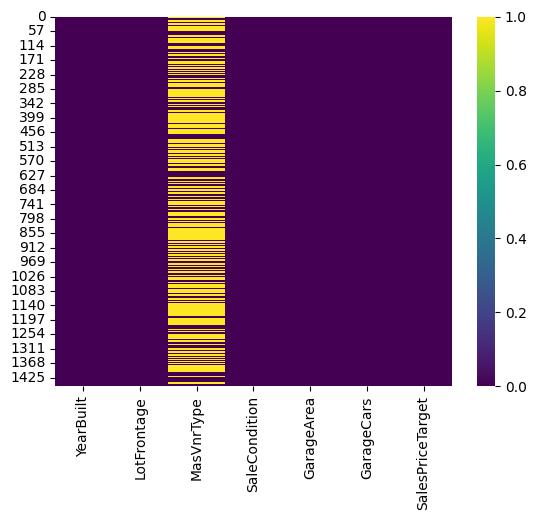

In [3472]:
sns.heatmap(df_subsetpt2.isna(), cmap='viridis')

### 2.2 Progressive Score Baseline 

#### 2.2.1  Score Baseline Inicial

Nesta fase inicial, iremos incluir apenas as variáveis de tipo numérico para calcular o score do baseline inicial, dado que o modelo de avaliação não suporta variáveis categóricas como entrada.

In [3473]:
baseline_scores = {}
baseline_df = df_subsetpt2.select_dtypes(include='number')

Abaixo é calculada a capacidade previsão do baseline inicial para a variável target. Os dados foram divididos em conjuntos de treino e teste, considerando apenas variáveis numéricas. Posteriormente, foi aplicada a função score_approach para avaliar a precisão inicial do modelo.

In [3474]:
# Baseline score
train_df, test_df = split_dataset(baseline_df, 'SalesPriceTarget')
baseline_scores['Baseline Initial'] = score_approach(train_df, test_df, 'SalesPriceTarget')
print(f"Baseline score: {baseline_scores['Baseline Initial']}")



Baseline score: 0.7406639004149378


#### 2.2.2  Score Baseline - Tranformação 1 (Ordinal Encoding) 

Sendo a variavel `MasVnrType` uma variável categórica, inicialmente considerei imputar os valores nulos pelo valor da moda. No entanto, após analisar o descritivo da variável, constatei que esta se refere aos diferentes tipos de revestimento, incluindo a existência de uma opção "None" que interpreto que seja  ausência de revestimento. Assi sendo os valores nulos não representam a ausência de informação, mas sim que a casa não possui revestimento.


MasVnrType: Masonry veneer type

-BrkCmn	Brick Common

-BrkFace	Brick Face

-CBlock	Cinder Block

**-None	None**

-Stone	Stone


Assim desta forma não seria correcto imputar o valor da moda, mas sim uma classificação que indique a ausência de revestimento na casa. 
Após uma pesquisa online, verifiquei que as opções em cima tem valores económicos diferentes, e tendo em conta que a variavel target deste problema está relacionado com o preço dos imoveis, decidi avançar com uma **encoding ordinal** consoante o tipo de material/valor económico de acordo com a ordem abaixo . 


Possível Ordem Implícita:

1-None: Sem revestimento, valor económico baixo; 

2-CBlock (Cinder Block): Material utilitário, geralmente econômico;

3-BrkCmn (Brick Common): Tijolo comum, mais acessível;

4-BrkFace (Brick Face): Tijolo decorativo, maior custo que o comum;

5-Stone: Pedra, geralmente considerada o material de maior qualidade e também com maior custo;

No código abaixo, a variável MasVnrType é adicionada ao baseline definido anteriormente. Em seguida, procede-se à imputação dos valores ausentes com a string 'None'. Esta imputação não é realizada após a divisão entre os subconjuntos de treino e teste, uma vez que é necessário que o valor tratado esteja presente no baseline inicial para ser utilizado na segunda iteração, na qual será adicionada uma nova variável categórica ao conjunto inicial. Caso esta abordagem não fosse adotada, seria possível realizar a transformação diretamente nos subconjuntos de treino e teste, criando uma cópia para passar a informação transformada.

In [3475]:
# Baseline score Transformação 1
baseline_df['MasVnrType'] = df_subsetpt2['MasVnrType']
none_imputer = SimpleImputer(strategy='constant', fill_value='None')
baseline_df[['MasVnrType']] = none_imputer.fit_transform(baseline_df[['MasVnrType']])


Abaixo a variável categórica `MasVnrType`é transformada numa  variavel ordinal , ordenando as categorias de acordo com a seguinte ordem:

1. **None**: Sem revestimento
2. **CBlock**: Bloco de concreto
3. **BrkCmn**: Tijolo comum
4. **BrkFace**: Tijolo decorativo
5. **Stone**: Pedra

In [3476]:
baseline_df['MasVnrType'] = pd.Categorical(
    baseline_df['MasVnrType'],
    categories=["None", "CBlock", "BrkCmn", "BrkFace", "Stone"],
    ordered=True
).codes


 No código abaixo é feito a  divisão entre os subconjuntos de treino e teste

In [3477]:
train_df_1, test_df_1 = split_dataset(baseline_df, 'SalesPriceTarget')

Novamente é feito uma verificação para confirmar que  o processo de imputação preencheu todos os valores em falta com o valor `None`

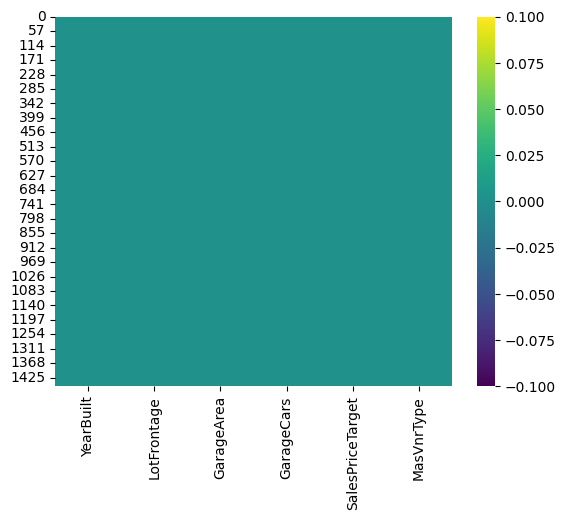

In [3478]:
# Apresentar variaveis com ausência de valores visualmente
sns.heatmap(baseline_df.isna(), cmap='viridis')

print(checkNullDataOnDataframe(baseline_df))

Abaixo é calculada a capacidade previsão do baseline inicial incluindo a transformação encoding ordinal `MasVnrType`,  para a variável target.

In [3479]:
# Baseline score Transformação 1
baseline_scores['Aproach 1-Ordinal Encoding'] = score_approach(train_df_1, test_df_1, 'SalesPriceTarget')
print(f"Baseline score 1: {baseline_scores['Aproach 1-Ordinal Encoding']}")

Baseline score 1: 0.7385892116182573


#### 2.2.3  Score Subset Baseline - Tranformação 2 (One Hot Encoding)

A variável SaleCondition descreve a condição da venda de uma propriedade e como tal é possivel que a condição tenha impacto na formação do preço de venda da propriedade. Sendo uma variavel categorica, neste exercicio a transformação aplicada será um one hot encoding.

A varivel categorica é adicionada ao dataframe do baseline, e feito uma confirmação através da função info() e impressão de um sample

In [3480]:
baseline_df['SaleCondition'] = df_subsetpt2['SaleCondition']
baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearBuilt         1460 non-null   int64  
 1   LotFrontage       1460 non-null   float64
 2   GarageArea        1460 non-null   int64  
 3   GarageCars        1460 non-null   int64  
 4   SalesPriceTarget  1460 non-null   int64  
 5   MasVnrType        1460 non-null   int8   
 6   SaleCondition     1460 non-null   object 
dtypes: float64(1), int64(4), int8(1), object(1)
memory usage: 70.0+ KB


In [3481]:
baseline_df.sample(5)

,YearBuilt,LotFrontage,GarageArea,GarageCars,SalesPriceTarget,MasVnrType,SaleCondition
1220,1964,66.0,288,1,0,0,Abnorml
1277,1967,69.0,480,2,1,3,Normal
987,2009,83.0,606,3,1,4,Partial
1176,1984,37.0,264,1,0,0,Normal
1117,1967,57.0,450,2,0,0,Normal


Abaixo é feito uma verificação dos valores dinstingos da varivel categorica adicionada

In [3482]:
# Get distinct values from the column
distinct_values = baseline_df['SaleCondition'].unique()

# Print the distinct values
print("Distinct values in 'variable':", distinct_values)

Distinct values in 'variable': ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


 No código abaixo é feito a  divisão entre os subconjuntos de treino e teste

In [3483]:
train_df_iter2, test_df_iter2 = split_dataset(baseline_df, 'SalesPriceTarget')

O código abaixo cria uma instância do OneHotEncoder para transformar a variável categórica em colunas binárias.O encoder é ajustado apenas com os dados de treino para evitar Data Leakage

In [3484]:
# Inicializar o OneHotEncoder
ohe_ = OHE(cols=['SaleCondition'], use_cat_names=True)

# Ajustar o encoder e transformar os dados
train_df_iter2 = ohe_.fit_transform(train_df_iter2)
test_df_iter2 = ohe_.fit_transform(test_df_iter2)


Abaixo é calculada a capacidade previsão do baseline inicial incluindo a transformação one hot encoding `SalesCondition`,  para a variável target.

In [3485]:
baseline_scores['Aproach 2-One Hot Encoding'] = score_approach(train_df_iter2,test_df_iter2, 'SalesPriceTarget')
print(f"Baseline score 2: {baseline_scores['Aproach 2-One Hot Encoding']}")

Baseline score 2: 0.7427385892116183


#### 2.2.4  Score Subset Baseline - Tranformação 3 (Bins Quantile Strategy)

A variável LotFrontage, como já tinhamos observávo, apresenta uma distribuição ligeiramente assimétrica à direita, indicando que a maioria dos valores está concentrada na parte inferior do intervalo (entre 0 e 100), com uma cauda longa à direita. Esta característica deve-se à presença de outliers, conforme confirmámos através do método dos interquartis.

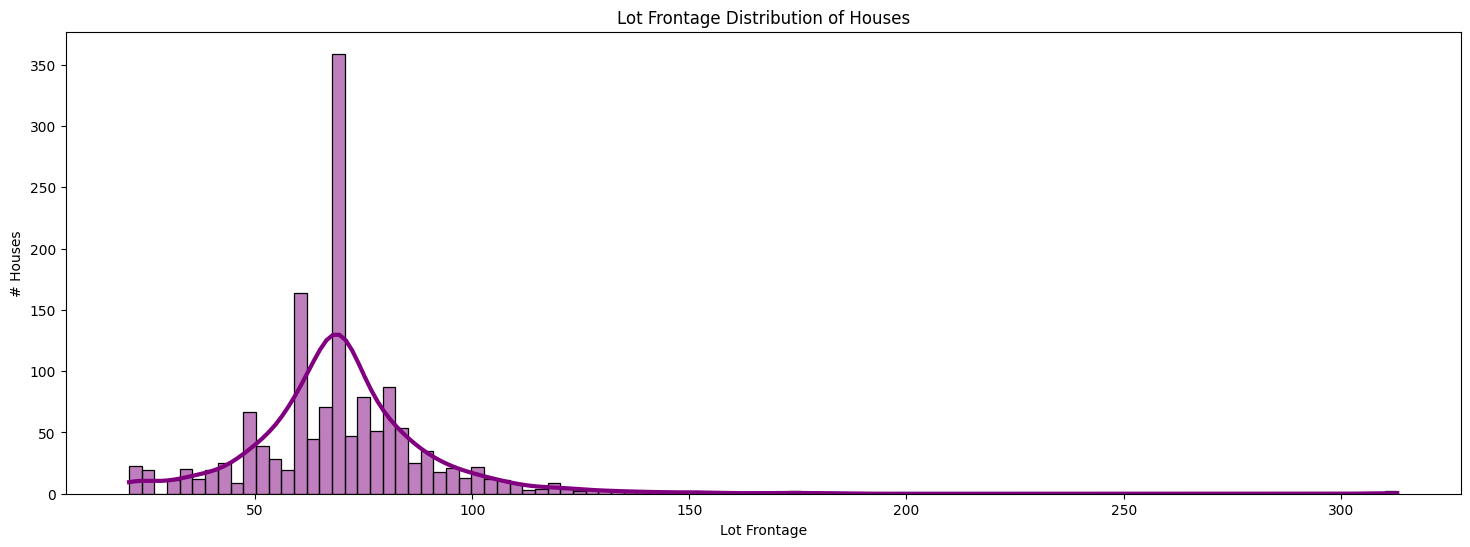

In [3486]:
plot_histogram(baseline_df, 'LotFrontage', bins=100, kde=True, line_width=3, title='Lot Frontage Distribution of Houses', xlabel='Lot Frontage', ylabel='# Houses',color='purple')

Verificação de outliers através do método interquatis

In [3487]:
outlierinfo = detect_outliers_iqr(baseline_df, 'LotFrontage')
print(outlierinfo[0])

{'Total de Outliers': np.int64(106), 'Limite Inferior': np.float64(31.5), 'Limite Superior': np.float64(107.5)}


Tendo em conta a presença de outliers, a transformação aplicada consistirá na criação de bins, dividindo os valores de LotFrontage em intervalos discretos. A estratégia selecionada para definir os bins foi o método quantile, que distribui aproximadamente o mesmo número de amostras por bin. Esta abordagem é particularmente adequada devido à distribuição não uniforme da variável, que apresenta um enviesamento à direita.

In [3488]:
train_df_iter3 = train_df_iter2.copy()
test_df_iter3 = test_df_iter2.copy()

código istancia objeto `KBinsDiscretizer` configurado para dividir os valores em 3 bins usando a estratégia `quantile`

In [3489]:
bin_quantile = KBinsDiscretizer(strategy='quantile', n_bins=3, encode='ordinal')

O seguinte código ajusta a transformação aos dados da variável LotFrontage no conjunto de treino

In [3490]:
bin_quantile.fit(train_df_iter3[['LotFrontage']])

KBinsDiscretizer(encode='ordinal', n_bins=3)

O seguinte bloco de código aplica a transformação da variável LotFrontage em bins , utilizando os limites calculados pelo objeto `bin_quantile`. Após a transformação, a variável original é substituída pela nova versão binned:

In [3491]:
train_df_iter3['LotFrontage_quantile'] = bin_quantile.transform(train_df_iter3[['LotFrontage']])
test_df_iter3['LotFrontage_quantile'] = bin_quantile.transform(test_df_iter3[['LotFrontage']])
train_df_iter3.drop(['LotFrontage'], axis=1, inplace=True)
test_df_iter3.drop(['LotFrontage'], axis=1, inplace=True)

train_df_iter3['LotFrontage_quantile'].value_counts()

LotFrontage_quantile
2.0    334
1.0    323
0.0    321
Name: count, dtype: int64

In [3492]:
baseline_scores['Aproach 3-Bins Quantile Strategy'] = score_approach(train_df_iter3,test_df_iter3, 'SalesPriceTarget')
print(f"Baseline score 3: {baseline_scores['Aproach 3-Bins Quantile Strategy']}")

Baseline score 3: 0.7614107883817427


#### 2.2.5  Score Subset Baseline - Tranformação 4 (Outliers Imputation)

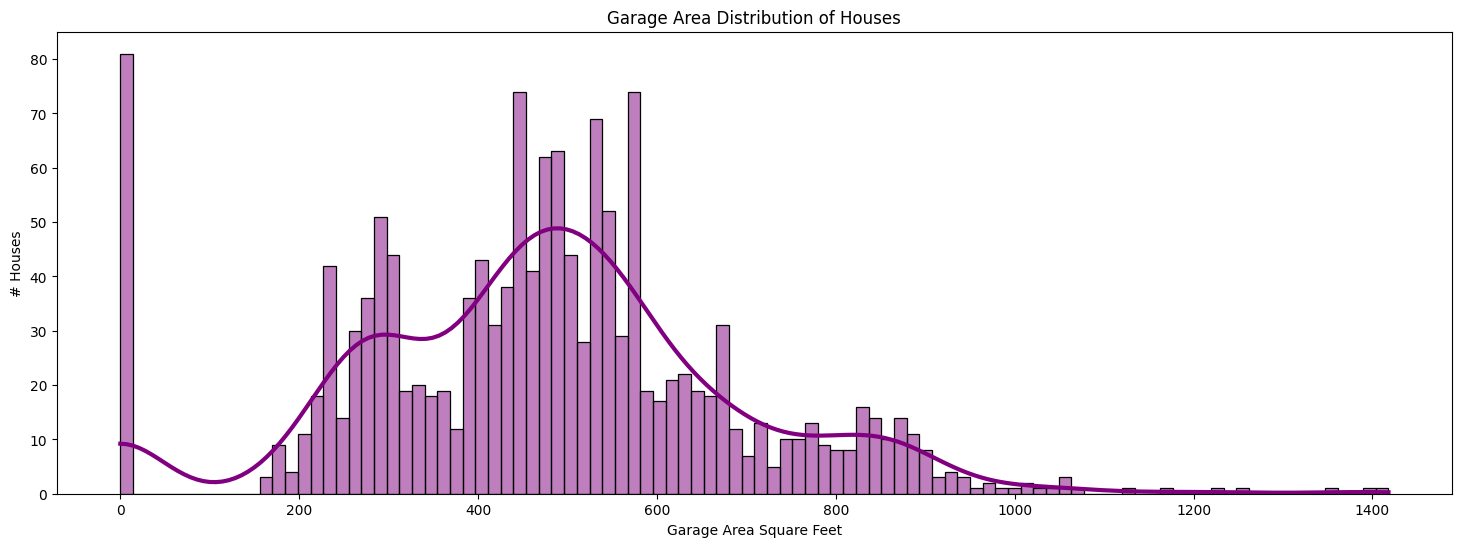

In [3493]:
plot_histogram(baseline_df, 'GarageArea', bins=100, kde=True, line_width=3, title='Garage Area Distribution of Houses', xlabel='Garage Area Square Feet', ylabel='# Houses',color='purple')

In [3494]:
#Calculate the mean Garage Area Houses.
print(f'Average Garage Area Houses is: {baseline_df.GarageArea.mean()}')

Average Garage Area Houses is: 472.9801369863014


In [3495]:
#Calculate the median Garage Area Houses.
print(f'Median Garage Area Houses is: {baseline_df.GarageArea.median()}')

Median Garage Area Houses is: 480.0


In [3496]:
outlierinfo = detect_outliers_iqr(baseline_df, 'GarageArea')
print(outlierinfo[0])

{'Total de Outliers': np.int64(21), 'Limite Inferior': np.float64(-27.75), 'Limite Superior': np.float64(938.25)}


In [3497]:
train_df_iter4 = train_df_iter3.copy()
test_df_iter4 = test_df_iter3.copy()

In [3498]:
# Calcula o IQR (Intervalo Interquartil)
Q1 = baseline_df['GarageArea'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = baseline_df['GarageArea'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Diferença entre Q3 e Q1

# Define os limites do IQR para detectar outliers
lower_bound_iqr = Q1 - 1.5 * IQR  # Limite inferior
upper_bound_iqr = Q3 + 1.5 * IQR  # Limite superior

train_df_iter4['GarageArea'] = train_df_iter4['GarageArea'].apply(
    lambda x: baseline_df.GarageArea.median() if x < lower_bound_iqr or x > upper_bound_iqr else x)
test_df_iter4['GarageArea'] = test_df_iter4['GarageArea'].apply(
    lambda x: baseline_df.GarageArea.median() if x < lower_bound_iqr or x > upper_bound_iqr else x)

bin_uniform = KBinsDiscretizer(strategy='uniform', n_bins=3, encode='ordinal')
bin_uniform.fit(train_df_iter4[['GarageArea']])
train_df_iter4['GarageAreaUniform'] = bin_uniform.transform(train_df_iter3[['GarageArea']])
test_df_iter4['GarageAreaUniform'] = bin_uniform.transform(test_df_iter3[['GarageArea']])
train_df_iter4.drop(['GarageArea'], axis=1, inplace=True)
test_df_iter4.drop(['GarageArea'], axis=1, inplace=True)


In [3499]:
baseline_scores['Aproach 4-Outliers Imputation'] = score_approach(train_df_iter4,test_df_iter4, 'SalesPriceTarget')
print(f"Baseline score 4: {baseline_scores['Aproach 4-Outliers Imputation']}")


Baseline score 4: 0.7551867219917012


A distribuição apresenta uma assimetria à direita, a maioria das casas tem uma área de garagem relativamente pequena, mas existem algumas casas com garagens significativamente maiores. Existe um valor alto em 0, indicando que há um número de casas que não possuem garagem

#### 2.2.6  Score Subset Baseline - Tranformação 5 (Feature Scaling)

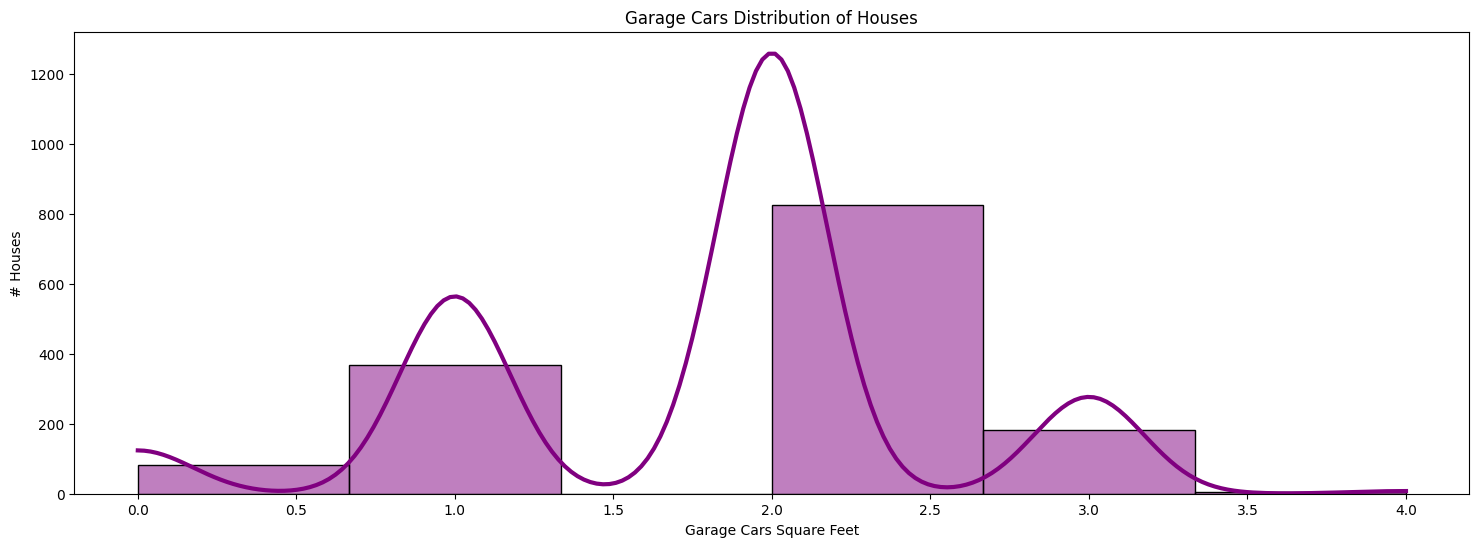

In [3500]:
plot_histogram(baseline_df, 'GarageCars', bins=6, kde=True, line_width=3, title='Garage Cars Distribution of Houses', xlabel='Garage Cars Square Feet', ylabel='# Houses',color='purple')

In [3501]:
mmscaler = MinMaxScaler(feature_range=(-1,1))

In [3502]:
# Fazer cópias dos DataFrames originais
train_df_iter5 = train_df_iter4.copy()
test_df_iter5 = test_df_iter4.copy()

# Verificar o shape inicial
print("Shape inicial (treino):", train_df_iter5.shape)
print("Shape inicial (teste):", test_df_iter5.shape)

# Definir as colunas para o scaler
input_columns_Scaler = ['GarageArea', 'GarageCars']

# Aplicar o MinMaxScaler aos dados de treino e teste
train_x_min_max_values = mmscaler.fit_transform(train_df_iter5[input_columns_Scaler])
test_x_min_max_values = mmscaler.transform(test_df_iter5[input_columns_Scaler])

# Criar novos DataFrames para os valores escalados
train_x_min_max_df = pd.DataFrame(train_x_min_max_values, 
                                  columns=[f"{col}_Scaled" for col in input_columns_Scaler])
test_x_min_max_df = pd.DataFrame(test_x_min_max_values, 
                                 columns=[f"{col}_Scaled" for col in input_columns_Scaler])

# Garantir que os índices estão alinhados
train_x_min_max_df.reset_index(drop=True, inplace=True)
test_x_min_max_df.reset_index(drop=True, inplace=True)
train_df_iter5.reset_index(drop=True, inplace=True)
test_df_iter5.reset_index(drop=True, inplace=True)

# Concatenar os DataFrames escalados com os originais
train_df_iter5 = pd.concat([train_df_iter5, train_x_min_max_df], axis=1)
test_df_iter5 = pd.concat([test_df_iter5, test_x_min_max_df], axis=1)

# Verificar o shape final
print("Shape final (treino):", train_df_iter5.shape)
print("Shape final (teste):", test_df_iter5.shape)


Shape inicial (treino): (978, 12)
Shape inicial (teste): (482, 12)
Shape final (treino): (978, 14)
Shape final (teste): (482, 14)


In [3503]:
#train_df_iter5.drop(columns=['GarageArea', 'GarageCars'],axis=1, inplace=True)
#test_df_iter5.drop(columns=['GarageArea', 'GarageCars'],axis=1, inplace=True)

In [3504]:
baseline_scores['Aproach 5-Feature Scaling'] = score_approach(train_df_iter5,test_df_iter5, 'SalesPriceTarget')
print(f"Baseline score 5: {baseline_scores['Aproach 5-Feature Scaling']}")

Baseline score 5: 0.7614107883817427


#### 2.2.6  Score Subset Baseline - Tranformação 6 (Feature Enginering)

O ano de construção é uma medida absoluta que, por si pode não ser tão informativa, mas convertendo o ano em idate (ano atual - ano construção) fornece um contexto temporal mais relevante para o modelo capturar padrões

In [3505]:
train_df_iter3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 163 to 1274
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearBuilt              978 non-null    int64  
 1   GarageArea             978 non-null    int64  
 2   GarageCars             978 non-null    int64  
 3   MasVnrType             978 non-null    int8   
 4   SaleCondition_Normal   978 non-null    int64  
 5   SaleCondition_Abnorml  978 non-null    int64  
 6   SaleCondition_Partial  978 non-null    int64  
 7   SaleCondition_Family   978 non-null    int64  
 8   SaleCondition_Alloca   978 non-null    int64  
 9   SaleCondition_AdjLand  978 non-null    int64  
 10  SalesPriceTarget       978 non-null    int64  
 11  LotFrontage_quantile   978 non-null    float64
dtypes: float64(1), int64(10), int8(1)
memory usage: 92.6 KB


In [3506]:
train_df_iter6 = train_df_iter5.copy()
test_df_iter6 = test_df_iter5.copy()


current_year = datetime.datetime.now().year
train_df_iter6['HouseAge'] = current_year - train_df_iter6['YearBuilt']
test_df_iter6['HouseAge'] = current_year - test_df_iter6['YearBuilt']


train_df_iter6.drop(columns=['YearBuilt'],axis=1, inplace=True)
test_df_iter6.drop(columns=['YearBuilt'],axis=1, inplace=True)

baseline_scores['Aproach 6-Feature Enginering'] = score_approach(train_df_iter6,test_df_iter6, 'SalesPriceTarget')
print(f"Baseline score 6: {baseline_scores['Aproach 6-Feature Enginering']}")

Baseline score 6: 0.7821576763485477


### 2.3 Conclusões finais 

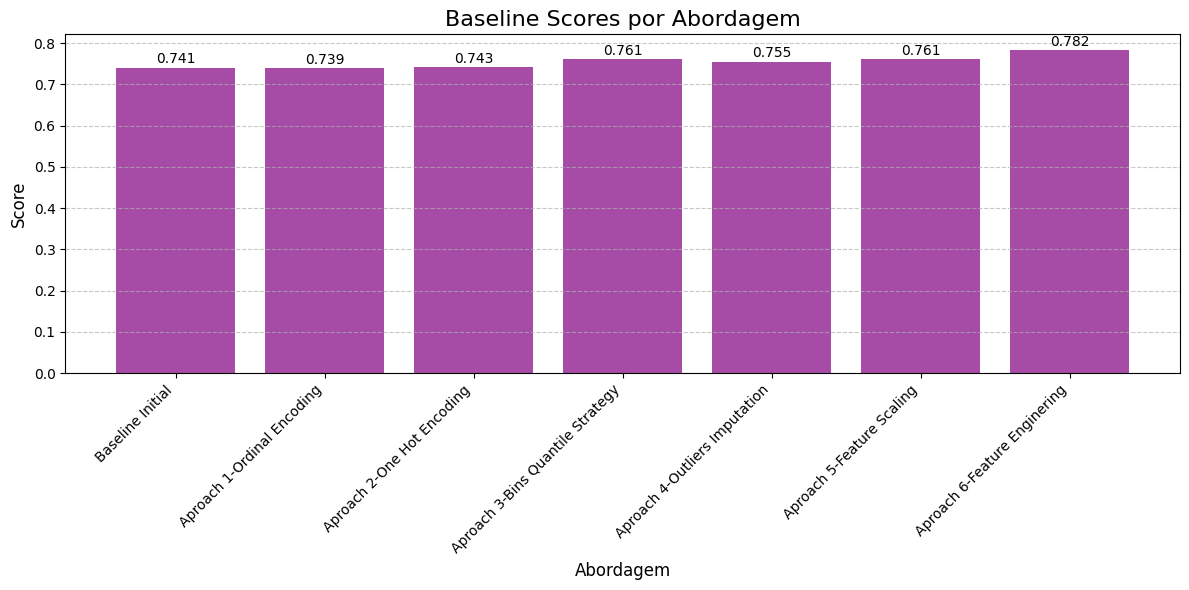

In [3507]:
# Criar o gráfico de barras
baseline_scores_df = pd.DataFrame(list(baseline_scores.items()), columns=['Approach', 'Score'])

plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
plt.bar(baseline_scores_df['Approach'], baseline_scores_df['Score'], color='purple', alpha=0.7)

# Títulos e Rótulos
plt.title('Baseline Scores por Abordagem', fontsize=16)
plt.xlabel('Abordagem', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adicionar os valores acima das barras
for index, value in enumerate(baseline_scores_df['Score']):
    plt.text(index, value + 0.01, f"{value:.3f}", ha='center', fontsize=10, color='black')

# Grade no eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()  
plt.show()

Gráfico com a evolução da performance do modelo